### Project details.
in this project I tried to automate the process of extracting real time data using coin_market_cap_API. And perform exploratory data analysis on the extracted data.

In [47]:
# testing coinmarket_cap API 

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'500',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a4373e3f-f98b-403b-8887-9989d5a673bb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



{'status': {'timestamp': '2022-10-30T16:50:03.776Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 3, 'notice': None, 'total_count': 9390}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9807, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [48]:
import pandas as pd
data_df = pd.json_normalize(data["data"])

In [49]:
data_df
# doesnot show all the columns 

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9807,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919355e+07,1.919355e+07,...,3.962433e+11,39.0263,4.335367e+11,NaN,2022-10-30T16:49:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6161,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,1.945214e+11,19.1524,1.945214e+11,NaN,2022-10-30T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,41372,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.910309e+10,7.114177e+10,...,6.911978e+10,6.8077,7.115894e+10,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599787e+08,1.599800e+08,...,4.988855e+10,4.9136,6.236901e+10,NaN,2022-10-30T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,6629,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.370771e+10,4.370771e+10,...,4.370217e+10,4.3029,4.370217e+10,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4191,Syntropy,NOIA,syntropy,13,2019-07-31T00:00:00.000Z,"[iot, scaling, staking, substrate, governance,...",1.000000e+09,6.158734e+08,1.000000e+09,...,2.767763e+07,0.0027,4.494046e+07,NaN,2022-10-30T16:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa8c8CfB141A3bB59FEA1E2ea6B79b5ECBCD7b6ca
496,10188,Automata Network,ATA,automata-network,51,2021-06-01T00:00:00.000Z,"[binance-launchpool, bnb-chain]",NaN,1.722520e+08,1.000000e+09,...,2.760886e+07,0.0027,1.602818e+08,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa2120b9e674d3fc3875f415a7df52e382f141225
497,2505,Bluzelle,BLZ,bluzelle,66,2018-02-06T00:00:00.000Z,"[platform, cosmos-ecosystem, distributed-compu...",NaN,3.410000e+08,5.000000e+08,...,2.753724e+07,0.0027,4.037719e+07,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0x5732046a883704404f284ce41ffadd5b007fd668
498,7725,TrueFi,TRU,truefi-token,51,2020-11-19T00:00:00.000Z,"[defi, ethereum-ecosystem, yield-farming, aval...",1.450000e+09,5.489562e+08,1.441129e+09,...,2.743658e+07,0.0027,7.247034e+07,4.461965e+07,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0x4c19596f5aaff459fa38b0f7ed92f11ae6543784


In [50]:
# to show all the columns 

pd.set_option('display.max_columns',None)
data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9807,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919355e+07,1.919355e+07,NaN,1,NaN,NaN,NaN,2022-10-30T16:49:00.000Z,20644.605712,3.292400e+10,-17.1448,-0.115290,-1.294026,7.541732,4.377185,2.759921,-11.160180,3.962433e+11,39.0263,4.335367e+11,NaN,2022-10-30T16:49:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6161,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,1589.566310,1.562629e+10,-25.2139,-0.187394,-2.872707,20.975735,17.175549,2.428746,-4.219615,1.945214e+11,19.1524,1.945214e+11,NaN,2022-10-30T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,41372,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.910309e+10,7.114177e+10,NaN,3,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,1.000241,5.859912e+10,-6.1958,0.000364,-0.005931,0.010707,0.017139,0.022547,0.003491,6.911978e+10,6.8077,7.115894e+10,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599787e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,311.845035,1.454358e+09,9.4338,0.052819,2.020062,15.075019,8.411540,10.830080,9.578010,4.988855e+10,4.9136,6.236901e+10,NaN,2022-10-30T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,6629,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.370771e+10,4.370771e+10,NaN,5,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,0.999873,4.026634e+09,-1.3058,-0.003466,-0.025197,-0.006779,-0.022769,-0.012875,-0.016024,4.370217e+10,4.3029,4.370217e+10,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4191,Syntropy,NOIA,syntropy,13,2019-07-31T00:00:00.000Z,"[iot, scaling, staking, substrate, governance,...",1.000000e+09,6.158734e+08,1.000000e+09,NaN,496,NaN,NaN,NaN,2022-10-30T16:49:00.000Z,0.044940,8.752708e+05,295.3469,-0.453004,-12.772834,-10.106488,-29.665934,-23.094414,-33.692737,2.767763e+07,0.0027,4.494046e+07,NaN,2022-10-30T16:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa8c8CfB141A3bB59FEA1E2ea6B79b5ECBCD7b6ca
496,10188,Automata Network,ATA,automata-network,51,2021-06-01T00:00:00.000Z,"[binance-launchpool, bnb-chain]",NaN,1.722520e+08,1.000000e+09,NaN,497,275044571.0,4.408464e+07,NaN,2022-10-30T16:48:00.000Z,0.160282,5.082652e+06,69.4138,-0.844189,-1.970146,2.396125,-5.857236,-2.740806,-25.241658,2.760886e+07,0.0027,1.602818e+08,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa2120b9e674d3fc3875f415a7df52e382f141225
497,2505,Bluzelle,BLZ,bluzelle,66,2018-02-06T00:00:00.000Z,"[platform, cosmos-ecosystem, distributed-compu...",NaN,3.410000e+08,5.000000e+08,NaN,498,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,0.080754,7.059868e+06,-39.6702,-0.074986,-1.434169,8.065090,-8.920119,-20.337686,-23.195825,2.753724e+07,0.0027,4.037719e+07,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0x5732046a883704404f284ce41ffadd5b007fd668
498,7725,TrueFi,TRU,truefi-token,51,2020-11-19T00:00:00.000Z,"[defi, et

In [3]:
import os 

def run_api():
    global data_df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a4373e3f-f98b-403b-8887-9989d5a673bb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # avoid duplicating values in the script. 
    data_df = pd.json_normalize(data['data'])
    data_df['timestamp'] = pd.to_datetime('now')
    data_df
   
    # below script will let us store the whole data frame in a csv file format. 
    if not os.path.isfile(r"C:\Users\hp\Documents\cryto api data\Cypto_data2.csv"):
        data_df.to_csv(r"C:\Users\hp\Documents\cryto api data\Cypto_data2.csv", header = "column_names")
    else:
        data_df.to_csv(r"C:\Users\hp\Documents\cryto api data\Cypto_data2.csv", mode = "a", header = False)
        


        

In [6]:
from time import time 
from time import sleep
for i in range(2):
    run_api()
    print("execution done")
    sleep(60) # api will run after every 1 minute
exit()

{'status': {'timestamp': '2022-10-30T16:05:14.118Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 9389}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9807, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [51]:
# formating the data in a more understandable form

data_df.style.format({"max_supply": "{:.5f}"})
data_df.style.format({"circulating_supply": "{:.5f}"})
data_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9807,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919355e+07,1.919355e+07,NaN,1,NaN,NaN,NaN,2022-10-30T16:49:00.000Z,20644.605712,3.292400e+10,-17.1448,-0.115290,-1.294026,7.541732,4.377185,2.759921,-11.160180,3.962433e+11,39.0263,4.335367e+11,NaN,2022-10-30T16:49:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6161,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,1589.566310,1.562629e+10,-25.2139,-0.187394,-2.872707,20.975735,17.175549,2.428746,-4.219615,1.945214e+11,19.1524,1.945214e+11,NaN,2022-10-30T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,41372,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.910309e+10,7.114177e+10,NaN,3,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,1.000241,5.859912e+10,-6.1958,0.000364,-0.005931,0.010707,0.017139,0.022547,0.003491,6.911978e+10,6.8077,7.115894e+10,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599787e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,311.845035,1.454358e+09,9.4338,0.052819,2.020062,15.075019,8.411540,10.830080,9.578010,4.988855e+10,4.9136,6.236901e+10,NaN,2022-10-30T16:48:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,6629,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.370771e+10,4.370771e+10,NaN,5,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,0.999873,4.026634e+09,-1.3058,-0.003466,-0.025197,-0.006779,-0.022769,-0.012875,-0.016024,4.370217e+10,4.3029,4.370217e+10,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4191,Syntropy,NOIA,syntropy,13,2019-07-31T00:00:00.000Z,"[iot, scaling, staking, substrate, governance,...",1.000000e+09,6.158734e+08,1.000000e+09,NaN,496,NaN,NaN,NaN,2022-10-30T16:49:00.000Z,0.044940,8.752708e+05,295.3469,-0.453004,-12.772834,-10.106488,-29.665934,-23.094414,-33.692737,2.767763e+07,0.0027,4.494046e+07,NaN,2022-10-30T16:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa8c8CfB141A3bB59FEA1E2ea6B79b5ECBCD7b6ca
496,10188,Automata Network,ATA,automata-network,51,2021-06-01T00:00:00.000Z,"[binance-launchpool, bnb-chain]",NaN,1.722520e+08,1.000000e+09,NaN,497,275044571.0,4.408464e+07,NaN,2022-10-30T16:48:00.000Z,0.160282,5.082652e+06,69.4138,-0.844189,-1.970146,2.396125,-5.857236,-2.740806,-25.241658,2.760886e+07,0.0027,1.602818e+08,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa2120b9e674d3fc3875f415a7df52e382f141225
497,2505,Bluzelle,BLZ,bluzelle,66,2018-02-06T00:00:00.000Z,"[platform, cosmos-ecosystem, distributed-compu...",NaN,3.410000e+08,5.000000e+08,NaN,498,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,0.080754,7.059868e+06,-39.6702,-0.074986,-1.434169,8.065090,-8.920119,-20.337686,-23.195825,2.753724e+07,0.0027,4.037719e+07,NaN,2022-10-30T16:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0x5732046a883704404f284ce41ffadd5b007fd668
498,7725,TrueFi,TRU,truefi-token,51,2020-11-19T00:00:00.000Z,"[defi, et

In [52]:
data_df2 = data_df.rename(columns={'quote.USD.last_updated':'time_stamp'})


In [53]:
# changing the position of the timestamp

sixth_col = data_df2.pop('time_stamp')
data_df2.insert(6, 'time_stamp', sixth_col)
data_df2

,id,name,symbol,slug,num_market_pairs,date_added,time_stamp,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9807,2013-04-28T00:00:00.000Z,2022-10-30T16:49:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919355e+07,1.919355e+07,NaN,1,NaN,NaN,NaN,2022-10-30T16:49:00.000Z,20644.605712,3.292400e+10,-17.1448,-0.115290,-1.294026,7.541732,4.377185,2.759921,-11.160180,3.962433e+11,39.0263,4.335367e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6161,2015-08-07T00:00:00.000Z,2022-10-30T16:48:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,1589.566310,1.562629e+10,-25.2139,-0.187394,-2.872707,20.975735,17.175549,2.428746,-4.219615,1.945214e+11,19.1524,1.945214e+11,NaN,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,41372,2015-02-25T00:00:00.000Z,2022-10-30T16:48:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.910309e+10,7.114177e+10,NaN,3,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,1.000241,5.859912e+10,-6.1958,0.000364,-0.005931,0.010707,0.017139,0.022547,0.003491,6.911978e+10,6.8077,7.115894e+10,NaN,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1131,2017-07-25T00:00:00.000Z,2022-10-30T16:48:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599787e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,311.845035,1.454358e+09,9.4338,0.052819,2.020062,15.075019,8.411540,10.830080,9.578010,4.988855e+10,4.9136,6.236901e+10,NaN,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,6629,2018-10-08T00:00:00.000Z,2022-10-30T16:48:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.370771e+10,4.370771e+10,NaN,5,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,0.999873,4.026634e+09,-1.3058,-0.003466,-0.025197,-0.006779,-0.022769,-0.012875,-0.016024,4.370217e+10,4.3029,4.370217e+10,NaN,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4191,Syntropy,NOIA,syntropy,13,2019-07-31T00:00:00.000Z,2022-10-30T16:49:00.000Z,"[iot, scaling, staking, substrate, governance,...",1.000000e+09,6.158734e+08,1.000000e+09,NaN,496,NaN,NaN,NaN,2022-10-30T16:49:00.000Z,0.044940,8.752708e+05,295.3469,-0.453004,-12.772834,-10.106488,-29.665934,-23.094414,-33.692737,2.767763e+07,0.0027,4.494046e+07,NaN,1027.0,Ethereum,ETH,ethereum,0xa8c8CfB141A3bB59FEA1E2ea6B79b5ECBCD7b6ca
496,10188,Automata Network,ATA,automata-network,51,2021-06-01T00:00:00.000Z,2022-10-30T16:48:00.000Z,"[binance-launchpool, bnb-chain]",NaN,1.722520e+08,1.000000e+09,NaN,497,275044571.0,4.408464e+07,NaN,2022-10-30T16:48:00.000Z,0.160282,5.082652e+06,69.4138,-0.844189,-1.970146,2.396125,-5.857236,-2.740806,-25.241658,2.760886e+07,0.0027,1.602818e+08,NaN,1027.0,Ethereum,ETH,ethereum,0xa2120b9e674d3fc3875f415a7df52e382f141225
497,2505,Bluzelle,BLZ,bluzelle,66,2018-02-06T00:00:00.000Z,2022-10-30T16:48:00.000Z,"[platform, cosmos-ecosystem, distributed-compu...",NaN,3.410000e+08,5.000000e+08,NaN,498,NaN,NaN,NaN,2022-10-30T16:48:00.000Z,0.080754,7.059868e+06,-39.6702,-0.074986,-1.434169,8.065090,-8.920119,-20.337686,-23.195825,2.753724e+07,0.0027,4.037719e+07,NaN,1027.0,Ethereum,ETH,ethereum,0x5732046a883704404f284ce41ffadd5b007fd668
498,7725,TrueFi,TRU,truefi-token,51,2020-11-19T00:00:00.000Z,2022-10-30T16:48:00.00

## above we have 3 matrics:

market dominance = the measure of the quallity of a token relative to its competition

dilluted market cap = market cap when all of the tokens have been mined or released

market cap = current overall value of the token in fiat

In [12]:
# sorting the data to so as to make it more understandable

data_df3 = data_df.groupby('name', sort=False)[[  'quote.USD.market_cap', 'quote.USD.market_cap_dominance','quote.USD.fully_diluted_market_cap']].mean()

In [13]:
data_df3.head(15)

,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap
name,,,
Bitcoin,3.967176e+11,39.0979,4.340568e+11
Ethereum,1.943305e+11,19.1589,1.943305e+11
Tether,6.911983e+10,6.8182,7.115900e+10
BNB,4.961035e+10,4.8937,6.202120e+10
USD Coin,4.369648e+10,4.3080,4.369648e+10
XRP,2.303246e+10,2.2720,4.598636e+10
Binance USD,2.139034e+10,2.1100,2.139034e+10
Dogecoin,1.516431e+10,1.4950,1.516431e+10
Cardano,1.383485e+10,1.3640,1.813940e+10


In [14]:
data_df2['token_price'] = data_df2['quote.USD.market_cap']/data_df2['circulating_supply'] 
tokenPrice = data_df2.pop('token_price')
data_df2.insert(3, 'token_price', tokenPrice)
data_df3 = data_df2.head(15)
data_df3

,id,name,symbol,token_price,slug,num_market_pairs,date_added,time_stamp,tags,max_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,20669.371494,bitcoin,9807,2013-04-28T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,...,-11.338821,3.967176e+11,39.0979,4.340568e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,1588.006337,ethereum,6160,2015-08-07T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,...,-4.891917,1.943305e+11,19.1589,1.943305e+11,NaN,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,1.000242,tether,41371,2015-02-25T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,...,0.003549,6.911983e+10,6.8182,7.115900e+10,NaN,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,310.106012,bnb,1131,2017-07-25T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,...,8.465944,4.961035e+10,4.8937,6.202120e+10,NaN,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,0.999954,usd-coin,6629,2018-10-08T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,...,0.007894,4.369648e+10,4.3080,4.369648e+10,NaN,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,0.459864,xrp,829,2013-08-04T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,...,21.287229,2.303246e+10,2.2720,4.598636e+10,NaN,NaN,NaN,NaN,NaN,NaN
6,4687,Binance USD,BUSD,0.999788,binance-usd,5357,2019-09-20T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,...,0.024165,2.139034e+10,2.1100,2.139034e+10,NaN,1839.0,BNB,BNB,bnb,BUSD-BD1
7,74,Dogecoin,DOGE,0.114300,dogecoin,586,2013-12-15T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,...,66.085632,1.516431e+10,1.4950,1.516431e+10,NaN,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,0.403098,cardano,585,2017-10-01T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,...,-21.801313,1.383485e+10,1.3640,1.813940e+10,NaN,NaN,NaN,NaN,NaN,NaN
9,5426,Solana,SOL,32.197844,solana,394,2020-04-10T00:00:00.000Z,2022-10-30T16:06:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,...,-23.998327,1.155183e+10,1.1395,1.647296e+10,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data_df4 = data_df3[['name', 'token_price']]

In [16]:
data_df5 = data_df4.transpose()
data_df5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
name,Bitcoin,Ethereum,Tether,BNB,USD Coin,XRP,Binance USD,Dogecoin,Cardano,Solana,Polygon,Polkadot,Shiba Inu,Dai,TRON
token_price,20669.371494,1588.006337,1.000242,310.106012,0.999954,0.459864,0.999788,0.1143,0.403098,32.197844,0.909412,6.535618,0.000012,0.999471,0.063396


### A plot to show the comparison between crypto currencies

Text(0, 0.5, 'token_price')

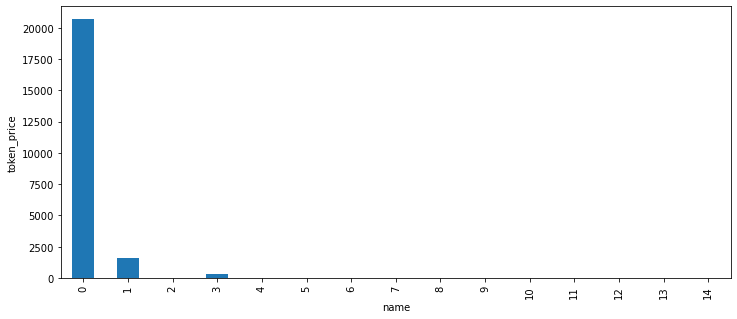

In [17]:
ax = data_df4.plot.bar(figsize=(12, 5), legend=False)
ax.set_xlabel("name")
ax.set_ylabel('token_price')

#### Becuase of the high price of the bitcoin we can't analyze the others so we decide to drop it 

In [18]:
# don't touch it 
data_df5.drop(data_df5.columns[[0]], axis = 1, inplace = True)

In [106]:
data_df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
name,Ethereum,Tether,BNB,USD Coin,XRP,Binance USD,Cardano,Solana,Dogecoin,Polygon,Polkadot,Dai,Shiba Inu,TRON
token_price,1506.918524,1.000134,286.727359,1.000039,0.461104,0.999516,0.384538,30.544265,0.082097,0.911404,6.395429,1.000076,0.000011,0.063058


In [19]:
data_df6 = data_df5.transpose()
data_df6

,name,token_price
1,Ethereum,1588.006337
2,Tether,1.000242
3,BNB,310.106012
4,USD Coin,0.999954
5,XRP,0.459864
6,Binance USD,0.999788
7,Dogecoin,0.1143
8,Cardano,0.403098
9,Solana,32.197844
10,Polygon,0.909412


#### to know about the token prices excluding bitcoin. 

<AxesSubplot:xlabel='name', ylabel='token_price'>

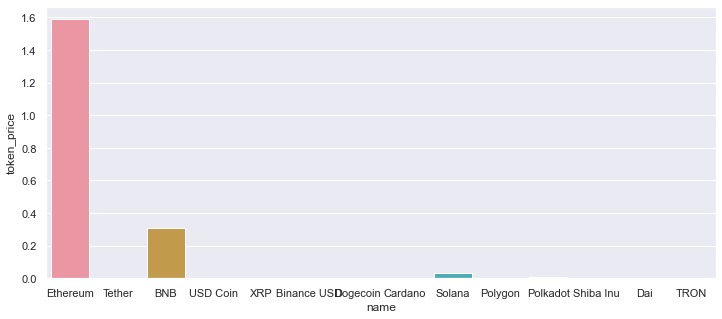

In [21]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,5)})

sns.barplot(x= data_df6['name'], y=data_df6['token_price']/1000, data=data_df6)

In [22]:
data_df7 = data_df6.drop(1)

<AxesSubplot:xlabel='name', ylabel='token_price'>

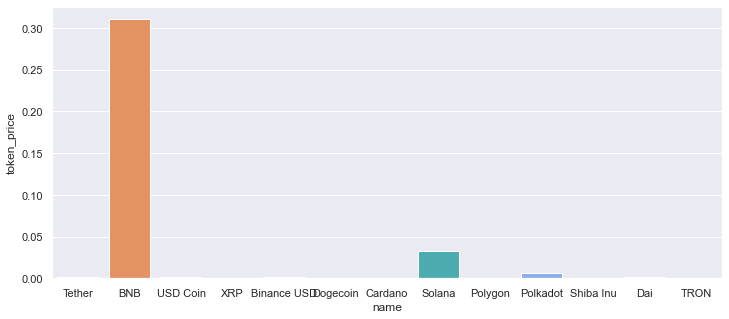

In [23]:
sns.set(rc={'figure.figsize':(12,5)})

sns.barplot(x= data_df7['name'], y=data_df7['token_price']/1000, data=data_df7)

# now we'll analyze the performance of the Meme_Coins vs Legit_Coins

for this experiment we'll look into the performance of some Meme coins and compare it with the performance of the Legit_coins

The matrix of measure that we'll take is " PERCENT CHANGE" that occurs in the price of a coin during a period of the ninety days.

Selected Coins are:

Meme coins: 1) Dogecoin, 2) Shiba Inu

Legit coins: 1) Bitcoin, 2) Ethereum, 3) Polkadot, 4) Solana

In [240]:
data_df10 = data_df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_90d']].mean()


In [25]:
data_df10

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.324545,-1.130961,7.667464,5.007586,-11.338821
Ethereum,-0.606965,-2.842567,20.908003,17.930236,-4.891917
Tether,0.002516,-0.003207,0.009049,0.017025,0.003549
BNB,-0.434356,2.001591,14.586321,8.155540,8.465944
USD Coin,-0.003446,0.003681,-0.002763,-0.000182,0.007894
XRP,-0.755677,-2.509903,0.569980,-3.468993,21.287229
Binance USD,-0.036234,-0.077567,-0.012395,-0.068245,0.024165
Dogecoin,-4.880466,-10.677254,92.652252,88.039373,66.085632
Cardano,-1.491543,-1.351635,14.766225,-7.253471,-21.801313


In [26]:
data_df11 = data_df10.head(20)

In [27]:
data_df11.rename(columns={'quote.USD.percent_change_1h' : '1H',
                           'quote.USD.percent_change_24h' :'24H', 
                           'quote.USD.percent_change_7d' :'7D',
                           'quote.USD.percent_change_30d' :'30D',
                               'quote.USD.percent_change_90d' :'90D'}, inplace = True) 

In [28]:
data_df11

,1H,24H,7D,30D,90D
name,,,,,
Bitcoin,-0.324545,-1.130961,7.667464,5.007586,-11.338821
Ethereum,-0.606965,-2.842567,20.908003,17.930236,-4.891917
Tether,0.002516,-0.003207,0.009049,0.017025,0.003549
BNB,-0.434356,2.001591,14.586321,8.155540,8.465944
USD Coin,-0.003446,0.003681,-0.002763,-0.000182,0.007894
XRP,-0.755677,-2.509903,0.569980,-3.468993,21.287229
Binance USD,-0.036234,-0.077567,-0.012395,-0.068245,0.024165
Dogecoin,-4.880466,-10.677254,92.652252,88.039373,66.085632
Cardano,-1.491543,-1.351635,14.766225,-7.253471,-21.801313


In [29]:
# this returns a series and hence we will need to convert that series into a data frame

data_df12 = data_df11.stack()
data_df12

name         
Bitcoin   1H     -0.324545
          24H    -1.130961
          7D      7.667464
          30D     5.007586
          90D   -11.338821
                   ...    
Litecoin  1H     -0.590590
          24H    -1.578585
          7D      5.891560
          30D     1.841462
          90D    -7.225536
Length: 100, dtype: float64

In [155]:
data_df12.count()

100

In [156]:
data_df12.to_frame(name='values')

values
name                   
Bitcoin  1H    0.123479
         24H  -2.011679
         7D    6.484495
         30D   8.302120
         90D -15.538289
...                 ...
Litecoin 1H    0.036852
         24H  -3.117724
         7D    7.207436
         30D   4.345594
         90D -13.052045

[100 rows x 1 columns]

In [100]:
data_df13 = data_df12.reset_index()
data_df13

,name,level_1,0
0,Bitcoin,1H,-0.324545
1,Bitcoin,24H,-1.130961
2,Bitcoin,7D,7.667464
3,Bitcoin,30D,5.007586
4,Bitcoin,90D,-11.338821
5,Ethereum,1H,-0.606965
6,Ethereum,24H,-2.842567
7,Ethereum,7D,20.908003
8,Ethereum,30D,17.930236
9,Ethereum,90D,-4.891917


### Let's look at the collective performance of all the coins over the past 90 Days

In [101]:
data_df13['values'] = data_df13[0]
data_df14 = data_df13.drop(columns=[0])
data_df14

,name,level_1,values
0,Bitcoin,1H,-0.324545
1,Bitcoin,24H,-1.130961
2,Bitcoin,7D,7.667464
3,Bitcoin,30D,5.007586
4,Bitcoin,90D,-11.338821
5,Ethereum,1H,-0.606965
6,Ethereum,24H,-2.842567
7,Ethereum,7D,20.908003
8,Ethereum,30D,17.930236
9,Ethereum,90D,-4.891917


### A plot to show the overall performance of the crypto market in the past 90 days 


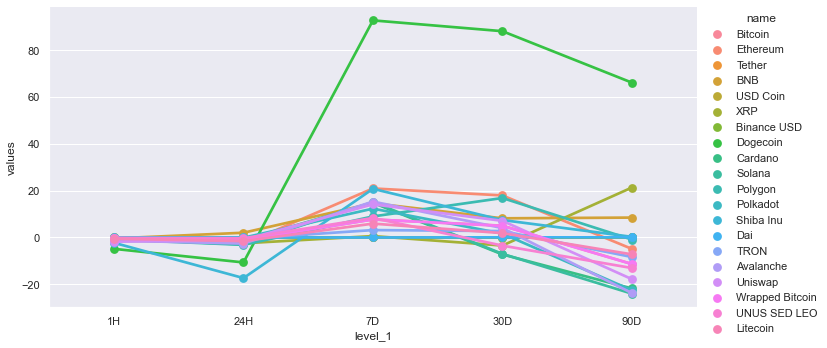

In [32]:
# plot to show the overall performance of all the coins. 

sns.catplot(x= "level_1", y="values", hue="name", data=data_df14, kind = "point", height=5, aspect=2)

In [33]:
data_df11

,1H,24H,7D,30D,90D
name,,,,,
Bitcoin,-0.324545,-1.130961,7.667464,5.007586,-11.338821
Ethereum,-0.606965,-2.842567,20.908003,17.930236,-4.891917
Tether,0.002516,-0.003207,0.009049,0.017025,0.003549
BNB,-0.434356,2.001591,14.586321,8.155540,8.465944
USD Coin,-0.003446,0.003681,-0.002763,-0.000182,0.007894
XRP,-0.755677,-2.509903,0.569980,-3.468993,21.287229
Binance USD,-0.036234,-0.077567,-0.012395,-0.068245,0.024165
Dogecoin,-4.880466,-10.677254,92.652252,88.039373,66.085632
Cardano,-1.491543,-1.351635,14.766225,-7.253471,-21.801313


## look at the performace of BNB in past 90 days

In [103]:
pd.set_option('display.max_columns',None)
data_df14


,name,level_1,values
0,Bitcoin,1H,-0.324545
1,Bitcoin,24H,-1.130961
2,Bitcoin,7D,7.667464
3,Bitcoin,30D,5.007586
4,Bitcoin,90D,-11.338821
5,Ethereum,1H,-0.606965
6,Ethereum,24H,-2.842567
7,Ethereum,7D,20.908003
8,Ethereum,30D,17.930236
9,Ethereum,90D,-4.891917


In [154]:
data_df15 = data_df14.loc[data_df14['name'] == 'Bitcoin']
data_df15

,name,level_1,values
0,Bitcoin,1H,-0.324545
1,Bitcoin,24H,-1.130961
2,Bitcoin,7D,7.667464
3,Bitcoin,30D,5.007586
4,Bitcoin,90D,-11.338821


In [107]:
import seaborn as sns

<AxesSubplot:xlabel='level_1', ylabel='values'>

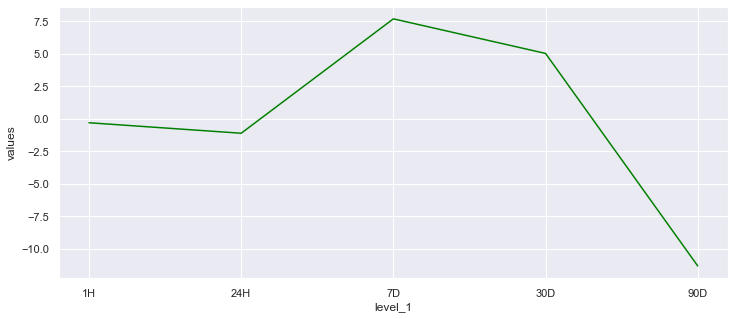

In [155]:
sns.lineplot(x= data_df15['level_1'], y= data_df15['values'], color='green')

In [119]:
data_dfDC = data_df14.loc[data_df14['name'] == 'Dogecoin']

In [120]:
data_dfDC

,name,level_1,values
35,Dogecoin,1H,-4.880466
36,Dogecoin,24H,-10.677254
37,Dogecoin,7D,92.652252
38,Dogecoin,30D,88.039373
39,Dogecoin,90D,66.085632


<AxesSubplot:xlabel='level_1', ylabel='values'>

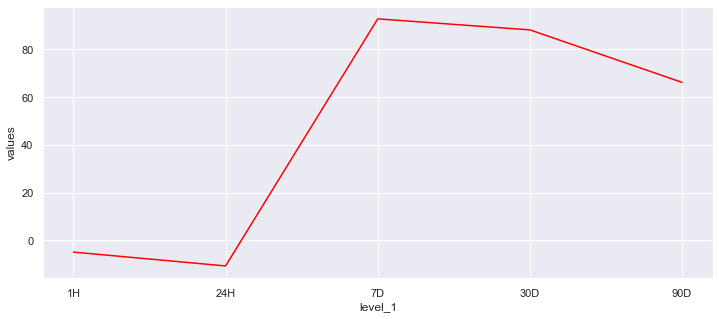

In [152]:
sns.lineplot(x= data_dfDC['level_1'], y= data_dfDC['values'], color='red')

In [143]:
import matplotlib.pyplot as plt 

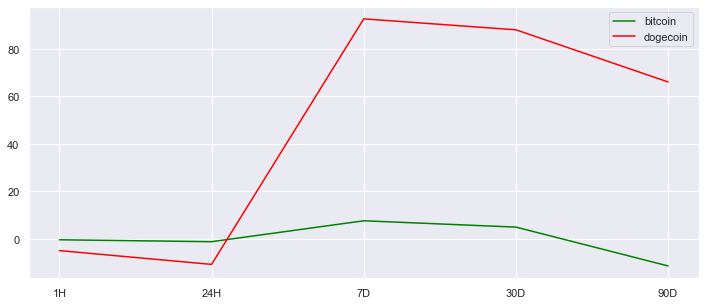

In [169]:
plt.plot(data_df15['level_1'], data_df15['values'], label= "bitcoin", color='green')
plt.plot(data_dfDC['level_1'], data_dfDC['values'], label= "dogecoin", color = "red")


plt.xlabel = 'TIME'
plt.ylabel = 'PRICE'
plt.legend()
plt.show()

In [159]:
data_dfSOL = data_df13.loc[data_df13['name'] == 'Solana']
data_dfSOL

,name,level_1,0,values
45,Solana,1H,-0.690447,-0.690447
46,Solana,24H,-2.968394,-2.968394
47,Solana,7D,15.095250,15.095250
48,Solana,30D,-7.013818,-7.013818
49,Solana,90D,-23.998327,-23.998327


In [161]:
data_dfDOT = data_df13[data_df13['name'] == 'Polkadot']
data_dfDOT

,name,level_1,0,values
55,Polkadot,1H,-1.335535,-1.335535
56,Polkadot,24H,-0.121849,-0.121849
57,Polkadot,7D,12.296036,12.296036
58,Polkadot,30D,1.630226,1.630226
59,Polkadot,90D,-22.554164,-22.554164


In [165]:
data_dfSHIB = data_df14[data_df14['name'] == 'Shiba Inu']
data_dfSHIB

,name,level_1,values
60,Shiba Inu,1H,-2.298147
61,Shiba Inu,24H,-17.362059
62,Shiba Inu,7D,20.742074
63,Shiba Inu,30D,7.420309
64,Shiba Inu,90D,0.251201


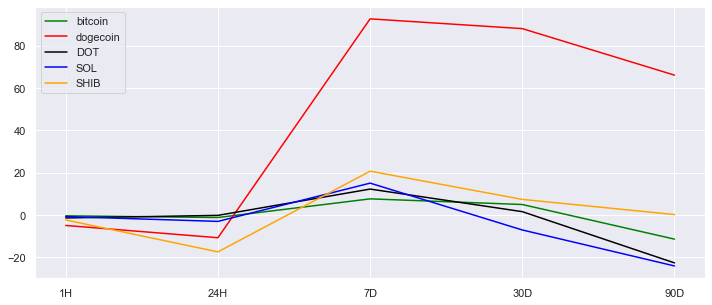

In [168]:
plt.plot(data_df15['level_1'], data_df15['values'], label= "bitcoin", color='green')
plt.plot(data_dfDC['level_1'], data_dfDC['values'], label= "dogecoin", color = "red")
plt.plot(data_dfDOT['level_1'], data_dfDOT['values'], label= "DOT", color = "black")
plt.plot(data_dfSOL['level_1'], data_dfSOL['values'], label= "SOL", color = "blue")
plt.plot(data_dfSHIB['level_1'], data_dfSHIB['values'], label= "SHIB", color = "orange")

plt.xlabel = 'TIME'
plt.ylabel = 'PRICE'
plt.legend()
plt.show()


#### from the above exploratory data anlysis of the crypto market, we can say that meme coins proved to be better at performing than the legit coins like BIT, SOL, DOT
